In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Convex Sets

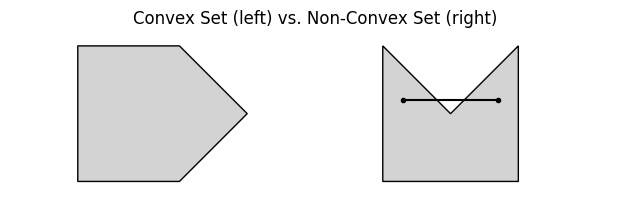

In [3]:
from matplotlib.patches import Polygon

# Coordinates for a convex polygon (a pentagon):
convex_coords = [(0.5,0), (2,0), (3,1), (2,2), (0.5,2)]

# Coordinates for a non-convex polygon with a "dent":
nonconvex_coords = [(5,0), (7,0), (7,2), (6,1), (5,2)]

fig, ax = plt.subplots()

# Create and add the convex polygon
convex_poly = Polygon(convex_coords, closed=True, facecolor="lightgray", edgecolor="black")
ax.add_patch(convex_poly)

# Create and add the non-convex polygon
nonconvex_poly = Polygon(nonconvex_coords, closed=True, facecolor="lightgray", edgecolor="black")
ax.add_patch(nonconvex_poly)

# Add a line inside the non-convex shape to show that it leaves the set
x_line = [5.3, 6.7]
y_line = [1.2, 1.2]
ax.plot(x_line, y_line, 'k-o', markersize=3)

# Set up the axes so both shapes are visible
ax.set_xlim(-0.5, 8.5)
ax.set_ylim(-0.2, 2.2)
ax.set_aspect('equal', adjustable='box')
ax.set_axis_off()
plt.title("Convex Set (left) vs. Non-Convex Set (right)")
plt.tight_layout()
plt.savefig('figures/convex_sets.pdf', bbox_inches='tight')

Convex Functions

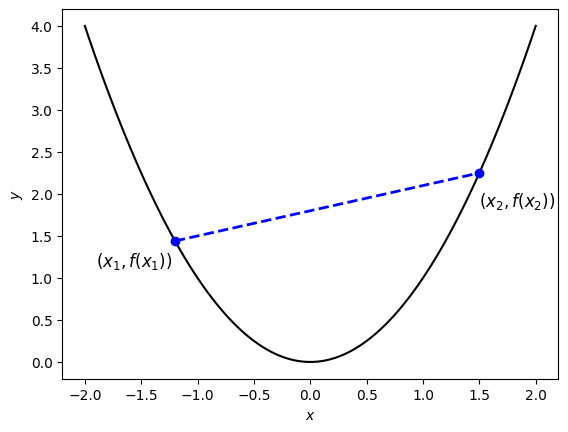

In [4]:
# Define the convex function (e.g., a quadratic function)
def f(x):
    return x**2

# Define two points on the function
x1, x2 = -1.2, 1.5
y1, y2 = f(x1), f(x2)

# Generate x values for plotting the function
x = np.linspace(-2, 2, 100)
y = f(x)

fig, ax = plt.subplots()

# Plot the convex function
ax.plot(x, y, 'k', label='$f(x)$')

# Plot the two points
ax.scatter([x1, x2], [y1, y2], color='blue', zorder=3)
ax.text(x1 - 0.7, y1 - 0.3, r'$(x_1, f(x_1))$', fontsize=12)
ax.text(x2, y2 - 0.4, r'$(x_2, f(x_2))$', fontsize=12)

# Plot the secant line between the two points
ax.plot([x1, x2], [y1, y2], 'b--', linewidth=2, label='Secant line')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.savefig('figures/convex_function.pdf')

First-Order Condition

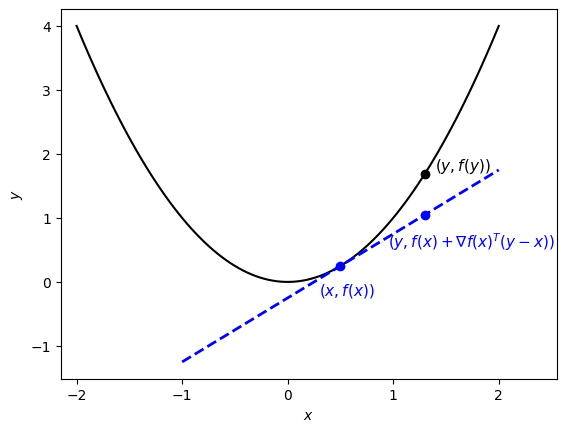

In [5]:
x = 0.5  
y = 1.3
fx = f(x)
fy = f(y)

# Compute the gradient at x
grad_f_x = 2*x  # Derivative of x^2

# Compute the first-order approximation at x
def first_order_approx(x_tangent):
    return fx + grad_f_x * (x_tangent - x)

# Generate x values for plotting the full function
x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)

# Generate tangent line values over a full range
x_tangent_vals = np.linspace(-1, 2, 100)
y_tangent_vals = first_order_approx(x_tangent_vals)

fig, ax = plt.subplots()

# Plot the convex function
ax.plot(x_vals, y_vals, 'k', label='$f(x)$')

# Plot the first-order approximation (tangent line)
ax.plot(x_tangent_vals, y_tangent_vals, 'b--', linewidth=2, label=r'$f(x) + \nabla f(x)^T (y-x)$')

# Plot the points
ax.scatter([y], [fy], color='k', zorder=3)
ax.scatter([x, y], [fx, first_order_approx(y)], color='blue', zorder=3)
ax.text(x - 0.2, fx - 0.45, r'$(x, f(x))$', color='blue', fontsize=11)
ax.text(y + 0.1, fy + 0.05, r'$(y, f(y))$', fontsize=11)
ax.text(y - 0.35, first_order_approx(y) - 0.5, r'$(y, f(x) + \nabla f(x)^T (y-x))$', color='blue', fontsize=11)

ax.set_xlim([-2.15, 2.55])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Show the plot
plt.savefig('figures/convexity_first_order.pdf')